# ** Dataset Churn ** #

Dataset que demonstra a rotatividade de clientes de um banco em um dado período de tempo. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


O primeiro passo, ao se trabalhar com um conjunto de dados, é conhecer as suas principais particularidades. Abaixo, descrevemos as informações contidas neste dataset.

In [40]:
df.info() # nos traz o panorama geral do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
curname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null int64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df[df.isnull().any(axis=1)] # confirmando se não há células com valores nulos

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


O Dataset é compostopor 10000 linhas e 14 colunas com variáveis integrais, floats e strings. Ele não apresenta NaN values.

### ** 1. Análise Exploratória de Dados ** ###

Após verificar os dados gerais do data set, observamos os valores que estão no interior de cada coluna para classificá-las como númerica ou categórica para assim poder fazer algumas análises preliminares.

Os nomes das colunas estão com letras maiúsculas, eu padronizo todas para minúsculas antes de prosseguir.

In [26]:
df.columns

Index(['rownumber', 'customerid', 'curname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [27]:
df.columns = (['rownumber', 'customerid', 'curname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'])

As variáveis contidas e seus significados estão abaixo:

1. rownumber - número de coluna (variável numérica)
2. customerid - número de identificação do cliente (variável numérica discreta)
3. curname - nome do cliente (variável categórica)
4. creditscore - pontuação de crédito (variável númerica)
7. geography - localização (variável categórica)
8. gender - sexo (variável categórica)
9. age - idade (variável numérica)
10. tenure - período em que o cliente se manteve utilizando o serviço (variável numérica discreta)
11. balance - saldo (variável numérica)
12. numofproducts - numéro de produtos adquiridos (variável numérica)
13. hascrcard - tem cartão de crédito? (variável numérica discreta)
14. isactivemember - conta ativa? (variável numérica discreta)
15. estimatedsalary - salário estimado (variável numérica)
16. exited - saiu do banco? (variável numérica discreta)

## 1.2. Estatística Básica ## 

***Variáveis quantitativas:***

As variáveis: hascrcard; isactivemember,e; exited; são variáveis numéricas que estão apenas classificando em sim e não determinados clientes. Por isso transformamos elas em objetos.

In [41]:
df.hascrcard = df.hascrcard.astype('object')
df.isactivemember = df.isactivemember.astype('object')
df.exited = df.exited.astype('object')

In [43]:
df.describe() #observando medidas de posição e desvios

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,estimatedsalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


*Observações:*

1. 75% dos clientes têm entre 32 e 44 anos, em geral pessoas economica ativas.
2. o máximo de produtos contratados pelos clientes é 4.
3. Em média a estimativa de salário dos clientes do banco é $ 100 mil (possivelmente estimativa de salário anual)



C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib

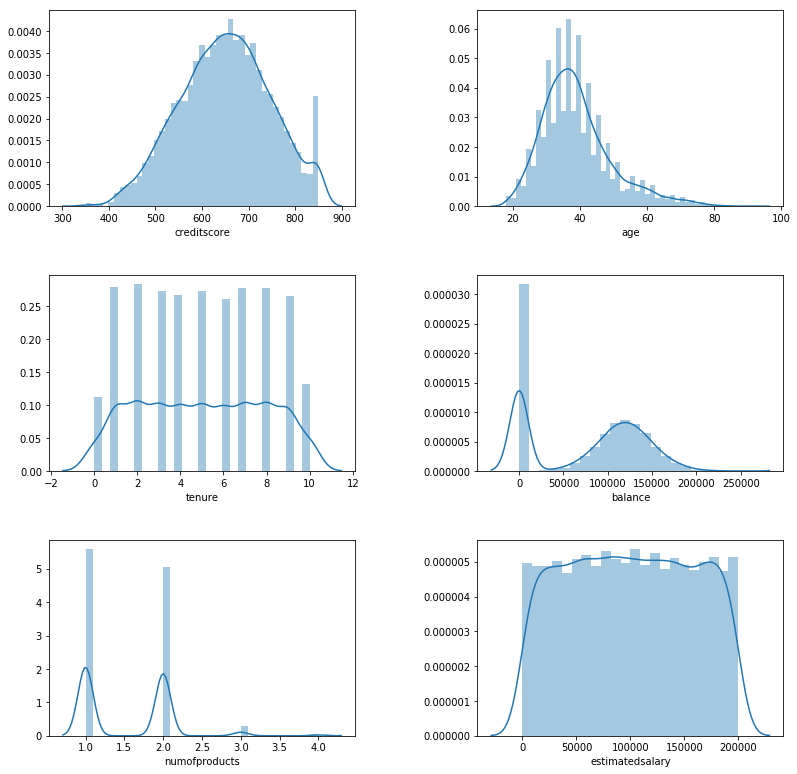

In [69]:
dados = ["creditscore", "creditscore", "age", "tenure", "balance",
             "numofproducts", "estimatedsalary"]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
for col, ax in zip(dados[1:], axs.ravel()):
    x=df.loc[:,col]
    sns.distplot(x, ax=ax,)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4);

*Observações:*

1. A distribuição do CreditScore é praticamente uma distribuição normal.
2. A distribuição do número de produtos é bimodal apontando que em geral os clientes contratam de um a dois produtos.

**Variáveis Categóricas** 

Como dito acima, há algumas variáveis que, embora sejam numéricas, apenas estavam classificando as variáveis e, por isso, estão sendo observadas separadamente. Nesta classificação 0 = não e 1 = sim

In [76]:
df.describe(include=['O'])

,curname,geography,gender,hascrcard,isactivemember,exited
count,10000,10000,10000,10000,10000,10000
unique,2932,3,2,2,2,2
top,Smith,France,Male,1,1,0
freq,32,5014,5457,7055,5151,7963


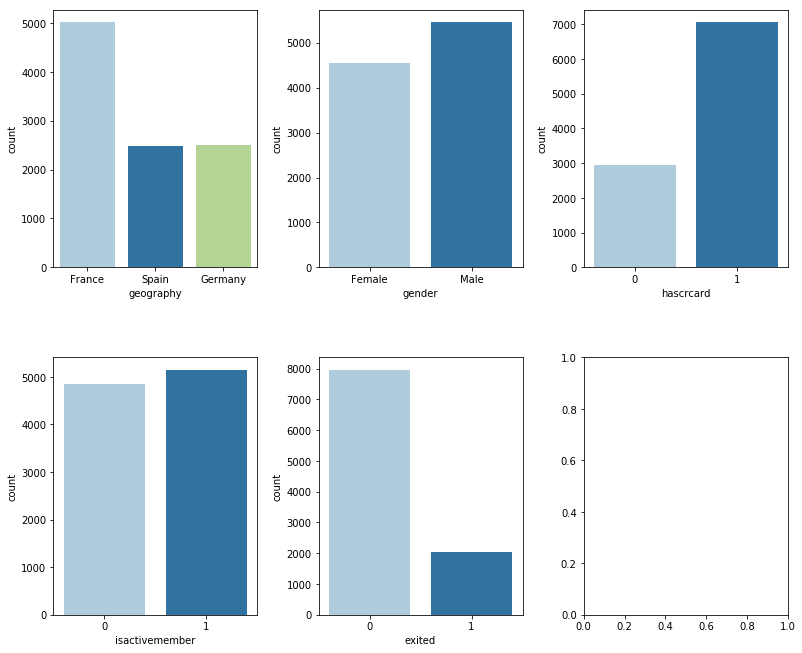

In [80]:
dados2 = ['geography','geography', 'gender', 'hascrcard','isactivemember', 'exited']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
for col, ax in zip(dados2[1:], axs.ravel()):
    sns.countplot(x=col, data=df, ax=ax, palette="Paired")
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3)

*Observações*

1. A maior parte dos clientes está na França.
2. A base de clientes é predominantemente masculina.
3. A maior parte dos clientes possue cartão de crédito.
4. No periodo analisado o número de clientes que saíram do banco foi menor do que os que se mantiveram nele.

** Correlação ** 

Após analisarmos as estatísticas básicas, buscamos compreender como e se as variáveis se correlacionam umas com as outras. Para isso plotamos um heatmap.

As variáveis rownumber e customerid não nos importa neste momento da análise, por isso iremos retira-la do dataframe  para fazermos esta análise Adicionaremos a variável gênero para vermos se há alguma correlação entre elas.

In [8]:
df_cor = df.copy()
df_cor.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [171]:
# Codificando gênero
# como 0 e 1 podem dar a idéia de pesos diferentes farei a codificação usando one hot encoding
one_hot = pd.get_dummies(df_cor.gender) 
one_hot.head() # 10 = female, 01=male

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [172]:
# unindo os dois datasets
df_cor = df_cor.join(one_hot)
df_cor.drop(columns = 'gender', inplace = True)
df_cor.head()

,curname,creditscore,geography,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,Female,Male
0,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


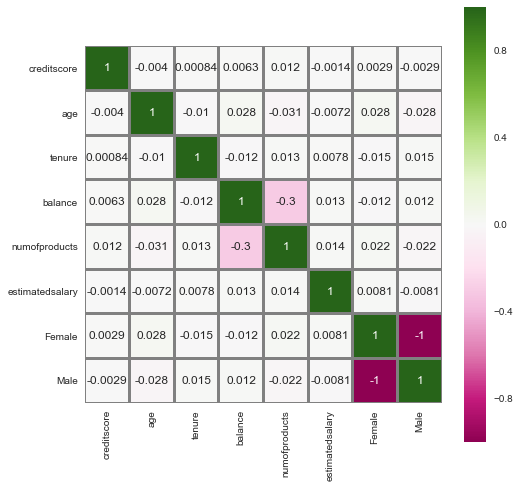

In [519]:
cm = df_cor.corr()
plt.figure(figsize = (8,8))
sns.heatmap(cm,cmap="PiYG", annot=True, linewidths=2, linecolor='gray', square =True)
plt.yticks(rotation =0)
plt.xticks(rotation =90);

*Observações*

Não conseguimos encontrar correlações entre as variáveis.

Para observarmos  o perfil dos clientes do banco, criamos algumas classes para melhorarmos a visualização e os insights que podemos extrair destes. 

In [28]:
# criando um novo dataset 
df_genero = df.copy()
df_genero.head()

,rownumber,customerid,curname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
#excluo as variáveis que não me importam nesta análise
df_genero.drop(columns=(['rownumber','customerid','curname']), inplace=True)
df_genero.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Para melhor visualizar as informações, crio classes para as variáveis, conforme abaixo:

**Idade:**

| **Idade**   | **Classe**   
|---------|:--------------:|
| 18  a 35|  1         |
| 35 a 60 |  2        |
| +de  60 | 3         |

-------------------------------------------------------------------------------------------------------------------
**Saldo em Conta:**

| **Saldo em Conta**   | **Classe**   
|---------|:--------------:|
| < 50.000 |  1          |
| 50.000 a 100.000 |  2  |
| 100.000 a 150.000 | 3  |
| 150.000 a 200.000 | 4  |
| > 200.000 | 5  |
-------------------------------------------------------------------------------------------------------------------
**Estimativa Salário:**

| **Estimativa**   | **Classe**   
|---------|:--------------:|
| < 50.000 |  1          |
| 50.000 a 100.000 |  2  |
| 100.000 a 150.000 | 3  |
| 150.000 a 200.000 | 4  |
| > 200.000 | 5  |

-------------------------------------------------------------------------------------------------------------------
**Pontuação de Crédito:**

| **Pont. Crédito**   | **Classe**   
|---------|:--------------:|
| 300 a 400 |  1          |
| 400 a 500 |  2  |
| 500 a 600 | 3  |
| 600 a 700 | 4  |
| acima de 700 | 5  |
-------------------------------------------------------------------------------------
| **País**   | **Classe**   
|---------|:--------------:|
| França |  1          |
| Alemanha |  2  |
| Espanha | 3  |


In [30]:
# classes

# 1. Idade:
df_genero.loc[(df_genero["age"] >= 18) & (df_genero["age"] <= 35), "age"] = int(1)
df_genero.loc[(df_genero["age"] > 35) & (df_genero["age"] <= 60), "age"] = int(2)
df_genero.loc[(df_genero["age"] > 60), "age"] = int(3)

# 2. Saldo em Conta:
df_genero.loc[(df_genero["balance"] < 50000), "balance"] = int(1)
df_genero.loc[(df_genero["balance"] >= 50000) & (df_genero["balance"] <= 100000), "balance"] = int(2)
df_genero.loc[(df_genero["balance"] >= 100000) & (df_genero["balance"] <= 150000), "balance"] = int(3)
df_genero.loc[(df_genero["balance"] >= 100000) & (df_genero["balance"] <= 150000), "balance"] = int(4)
df_genero.loc[(df_genero["balance"] >= 150000) & (df_genero["balance"] <= 200000), "balance"] = int(4)
df_genero.loc[(df_genero["balance"] >= 200000), "balance"] = int(5)
df_genero.head()

# 3. Estimativa Salário
df_genero.loc[(df_genero["estimatedsalary"] < 50000), "estimatedsalary"] = int(1)
df_genero.loc[(df_genero["estimatedsalary"] >= 50000) & (df_genero["estimatedsalary"] <= 100000), 
              "estimatedsalary"] = int(2)
df_genero.loc[(df_genero["estimatedsalary"] >= 100000) & (df_genero["estimatedsalary"] <= 150000), 
              "estimatedsalary"] = int(3)
df_genero.loc[(df_genero["estimatedsalary"] >= 100000) & (df_genero["estimatedsalary"] <= 150000), 
              "estimatedsalary"] = int(4)
df_genero.loc[(df_genero["estimatedsalary"] >= 150000) & (df_genero["estimatedsalary"] <= 200000), 
              "estimatedsalary"] = int(4)
df_genero.loc[(df_genero["estimatedsalary"] >= 200000), "estimatedsalary"] = int(5)
df_genero.head()

# 4. Pontuação de Crédito
df_genero.loc[(df_genero["creditscore"] >= 300) & (df_genero["creditscore"] < 400), "creditscore"] = int(1)
df_genero.loc[(df_genero["creditscore"] >= 400) & (df_genero["creditscore"] < 500),"creditscore"] = int(2)
df_genero.loc[(df_genero["creditscore"] >= 500) & (df_genero["creditscore"] < 600),"creditscore"] = int(3)
df_genero.loc[(df_genero["creditscore"] >= 600) & (df_genero["creditscore"] < 700),"creditscore"] = int(4)
df_genero.loc[(df_genero["creditscore"] >= 700), "creditscore"] = int(5)
df_genero.head()

# 5. Localização Geográfica
df_genero.loc[(df_genero["geography"] == "France", "geography")] = int(1)
df_genero.loc[(df_genero["geography"] == "Germany", "geography")] = int(2)
df_genero.loc[(df_genero["geography"] == "Spain", 'geography')] = int(3)

In [31]:
df_genero.head() # checo se todas as colunas foram transformadas.

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,4,1,Female,2,2,1.0,1,1,1,3.0,1
1,4,3,Female,2,1,2.0,1,0,1,3.0,0
2,3,1,Female,2,8,4.0,3,1,0,3.0,1
3,4,1,Female,2,1,1.0,2,0,0,2.0,0
4,5,3,Female,2,2,3.0,1,1,1,2.0,0


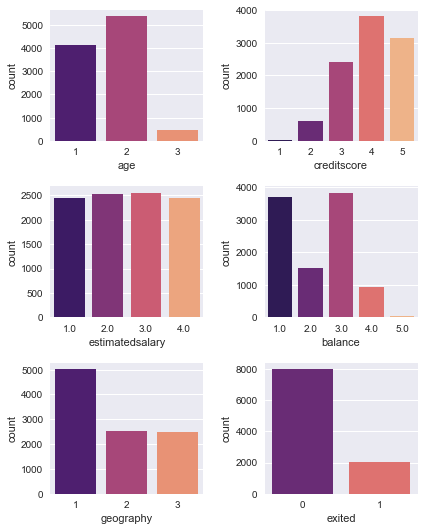

In [38]:
dados4 = ["age","age","creditscore", "estimatedsalary", "balance",'geography', "exited"]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(6, 8))
for col, ax in zip(dados4[1:], axs.ravel()):
    x=df_genero.loc[:,col]
    sns.set()
    sns.countplot(x, ax=ax, palette='magma')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

*Observações*

1. A faixa etária predominante de clientes do banco é de 35 a 60 anos. 
2. Aproximadamente 70% dos clientes possuem crédito score acima de 600 pontos
3. Aproximadamente 20% dos clientes possuem saldo acima de $ 200 mil.
4. Metade dos clientes do banco são franceses.
5. No período analisado mais clientes permaneceram no banco do que saíram. 

***Dúvida:***
Como será que a base de clientes se comporta ao analisarmos os dados separando por gênero? 

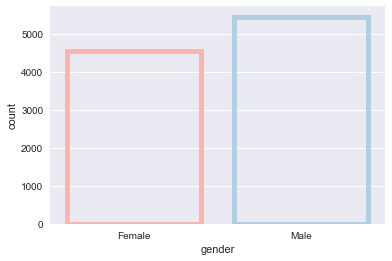

In [402]:
sns.countplot(df_genero['gender'],facecolor=(0, 0, 0, 0), linewidth=5,  edgecolor=sns.color_palette("Pastel1",5 ));

In [518]:
# calculando a porcentagem de mulheres clientes do banco
total = 10000
male = 5457
female = 4543
permale = (male*100)/total
perfemale = (female*100)/total
print(permale,perfemale)

54.57 45.43


*Observação:*
- O banco possui 55% de clientes homens e 45% de clientes mulheres.

*Dúvida:*
- será que mais mulheres do que homens fecharam sua conta no banco?

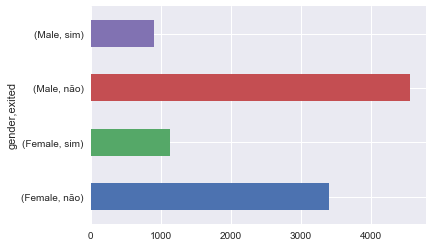

In [36]:
# Analisando a quantidade de mulheres que saíram do banco.
a = df.copy()
a.drop(columns=['rownumber', 'customerid', 'curname', 'creditscore', 'geography','age', 'tenure', 'balance', 
                'numofproducts', 'hascrcard','isactivemember', 'estimatedsalary'],inplace=True)

for i in range (len(a)):
    a['exited'] = a['exited'].replace({0:'não', 1:'sim'})
genero_saida = a.groupby('gender')['exited'].value_counts()
genero_saida.plot.barh();

Sim, mais mulheres do que homens fecharam a conta no banco.

Insight: Criar ações de marketing para fidelizar clientes mulheres e deixar o fechamento de contas igual ao dos homens.

Sugestão: Pesquisa de satisfação com clientes mulheres.

*Analisando demais categorias por gênero * (idade,crédito score, salário estimado,  saldo e localização geográfica)

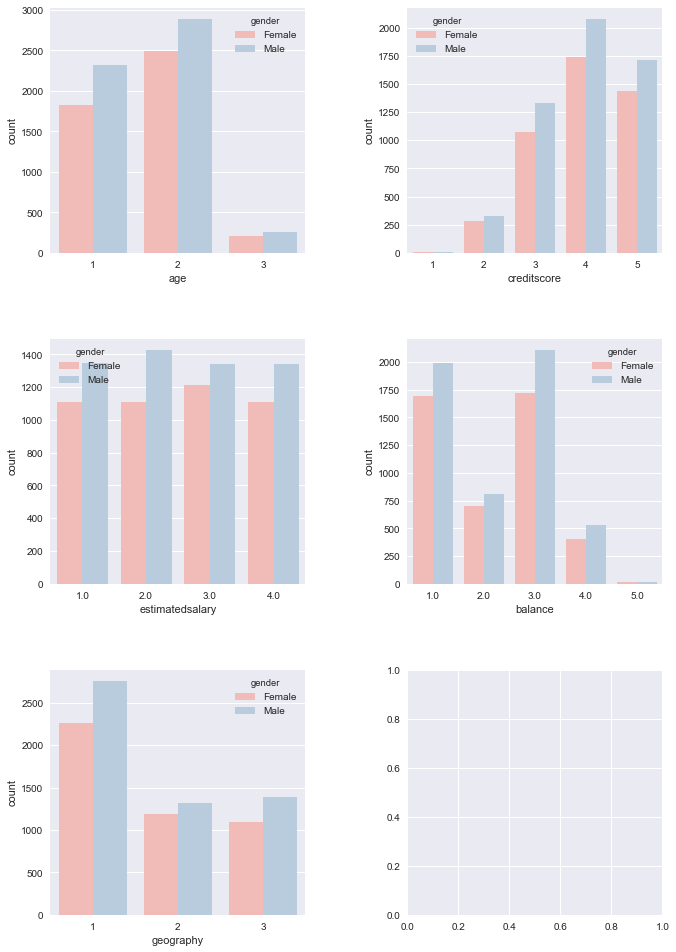

In [37]:
dados4 = ["age","age","creditscore", "estimatedsalary", "balance", 'geography']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for col, ax in zip(dados4[1:], axs.ravel()):
    x=df_genero.loc[:,col]
    sns.set()
    sns.countplot(x, hue=df_genero['gender'], ax=ax, palette='Pastel1')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

*Observações *

A proporção de mulheres em todas as faixas etárias, score, salariais, saldo e geografia é menor.

**Dúvida:** Como será que a base de clientes se comporta ao analisarmos os dados separando-os  por país??

In [76]:
df_pais = df_genero.copy() # fazemos uma cópia da base já previamente tratada
df_pais.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,4,1,Female,2,2,1.0,1,1,1,3.0,1
1,4,3,Female,2,1,2.0,1,0,1,3.0,0
2,3,1,Female,2,8,4.0,3,1,0,3.0,1
3,4,1,Female,2,1,1.0,2,0,0,2.0,0
4,5,3,Female,2,2,3.0,1,1,1,2.0,0


In [96]:
df_pais.gender = df_pais.gender.astype('category')
df_pais.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,4,1,1,2,2,1.0,1,1,1,3.0,1
1,4,3,1,2,1,2.0,1,0,1,3.0,0
2,3,1,1,2,8,4.0,3,1,0,3.0,1
3,4,1,1,2,1,1.0,2,0,0,2.0,0
4,5,3,1,2,2,3.0,1,1,1,2.0,0


In [116]:
df_pais['gender'] = df_pais['gender'].astype('category')
df_pais["gender"] = df_pais["gender"].cat.codes # feminino = 1 e masculino = 0
df_pais.loc[(df_pais["geography"] == 1, "geography")] = "France"
df_pais.loc[(df_pais["geography"] == 2, "geography")] = "Germany"
df_pais.loc[(df_pais["geography"] == 3, "geography")] = "Espanha"
df_pais.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,4,France,1,2,2,1.0,1,1,1,3.0,1
1,4,Espanha,1,2,1,2.0,1,0,1,3.0,0
2,3,France,1,2,8,4.0,3,1,0,3.0,1
3,4,France,1,2,1,1.0,2,0,0,2.0,0
4,5,Espanha,1,2,2,3.0,1,1,1,2.0,0


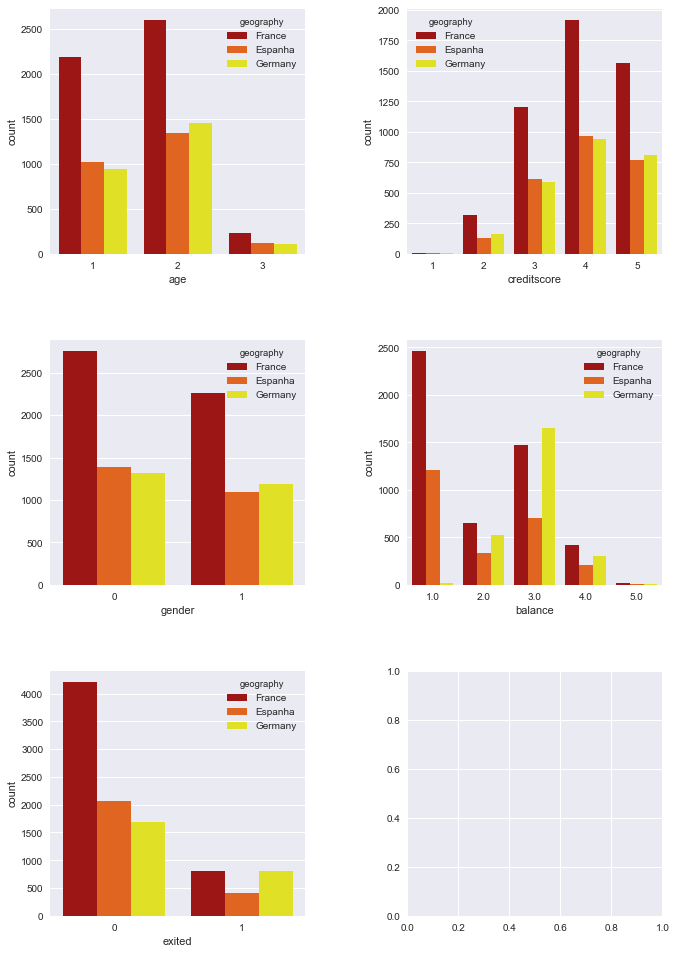

In [122]:
dados5 = ["age","age","creditscore", "gender", "balance",'exited']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for col, ax in zip(dados5[1:], axs.ravel()):
    x=df_pais.loc[:,col]
    sns.set()
    sns.countplot(x, hue=df_pais['geography'], ax=ax, palette = 'hot')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

*Observações:*

1. Os clientes franceses são os que apresentam o maior credit score e aqueles cuja a saída  do banco foi menor
2. O volume de clientes espanhóis é o menor de todos, possivelmente seja necessário adequar o plano de comunicação e marketing do banco ao público espanhol - caso seja esse um mercado que o banco tenha interesse em aumentar a sua presença